<a href="https://colab.research.google.com/github/nitin-pandita/House-Prediction-Model/blob/main/House_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies


In [1]:
import numpy as np #for numeric data
import pandas as pd # for rows and columns
import matplotlib.pyplot as plt #for graph plot
import seaborn as sns # for visualization
import sklearn.datasets #for getting the datasets
from sklearn.model_selection import train_test_split # for splitting the test and train data
from xgboost import XGBRegressor # model for predicition
from sklearn import metrics 

We will be using XGBoost as its a classification model, we are dealing with values here we will be using the Classification model for this

Importing the dataset 

In [2]:
house_data_predicition = pd.read_csv('/content/ParisHousing.csv')


In [3]:
#loading the dataset to pandas DataFrame
house_data_predicition = pd.DataFrame(house_data_predicition)

In [4]:
print(house_data_predicition)

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005        

In [5]:
house_data_predicition.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [6]:
house_data_predicition.shape

(10000, 17)

Now Searching if there is any Empty value in the dataset


In [7]:
house_data_predicition.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

Getting the Statistical Data for each Column

In [8]:
house_data_predicition.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


Understanding the Correlation in the dataset

We have two types of Correlation

1. Positive Correlation : If one variable inc and other variable also increase it is called Positive Correleation

2. Negative Correlation : If one variable dec and other variable also dec it is called Negative Cooreleation

**Correleation variable will contain all the correleated Data**

In [9]:
correleation = house_data_predicition.corr()

sns.Headmap - components are

1. cbar = True (The chart)

2. square - True ( Means the Square is True )

3. fmt - Floating Value

4. annot - values to be labelled

5. annot_kws - annot size

5. cmap - color of HeatMap

<Axes: >

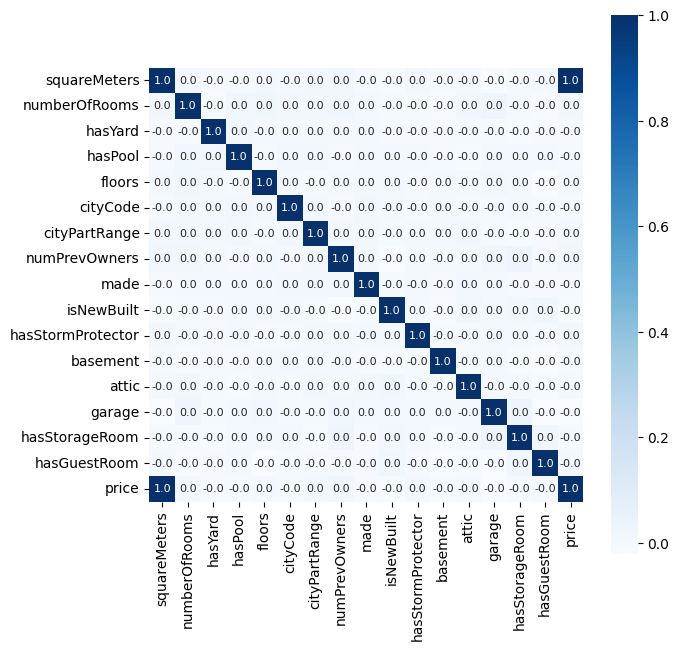

In [10]:
#construcuting the Headmap to find the Correleation between the variable in the dataset
plt.figure(figsize=(7,7))
sns.heatmap(correleation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

<Axes: >

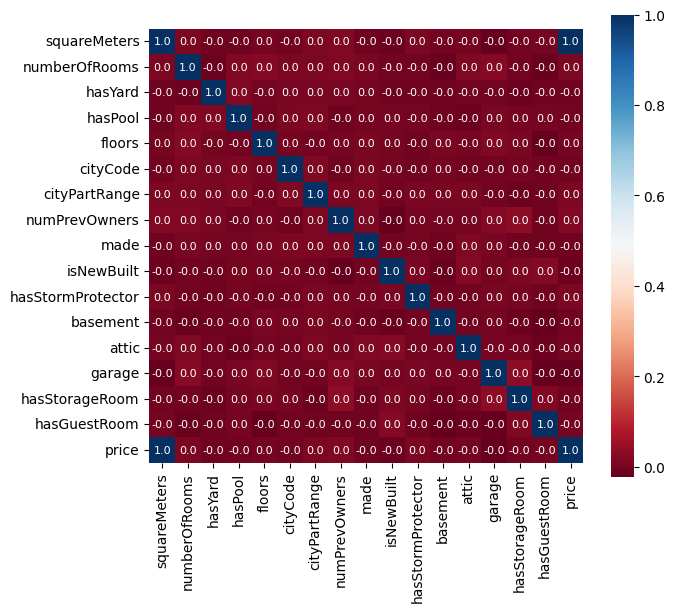

In [11]:
plt.figure(figsize=(7,6))
sns.heatmap(correleation, cbar= True, square=True, fmt= '.1f', annot=True, annot_kws={'size': 8}, cmap='RdBu' )

Splitting the price data

In [12]:
#now splitting the data and training data
X = house_data_predicition.drop(['price'], axis=1)
Y = house_data_predicition['price']

In [13]:
print(X)
print(Y)

      squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0            75523              3        0        1      63      9373   
1            80771             39        1        1      98     39381   
2            55712             58        0        1      19     34457   
3            32316             47        0        0       6     27939   
4            70429             19        1        1      90     38045   
...            ...            ...      ...      ...     ...       ...   
9995          1726             89        0        1       5     73133   
9996         44403             29        1        1      12     34606   
9997         83841              3        0        0      69     80933   
9998         59036             70        0        0      96     55856   
9999          1440             84        0        0      49     18412   

      cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0                 3              8  2005        

Splitting the testing and Training Data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(10000, 16) (8000, 16) (2000, 16)


Model Training


XGBoost Regressor


In [16]:
#loading the model
model = XGBRegressor()


In [17]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluating

In [18]:
training_data_prediction = model.predict(X_train)

In [19]:
print(training_data_prediction)

[ 595998.5   573613.06 6554042.   ... 3966622.   4505874.   1085920.1 ]


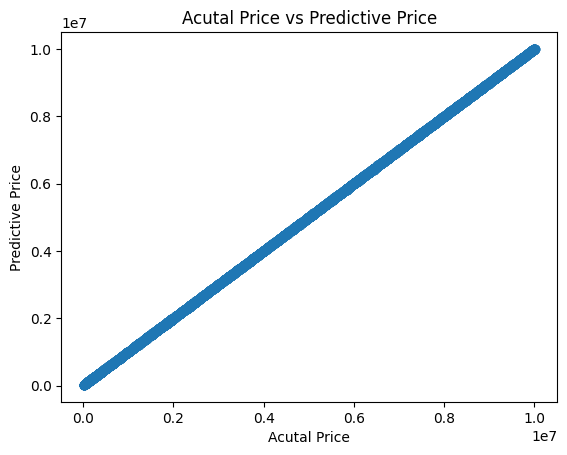

In [29]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Acutal Price")
plt.ylabel("Predictive Price")
plt.title("Acutal Price vs Predictive Price")
plt.show()

Finding the R square error and absoulute error

In [22]:
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# predicting the absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [23]:

print(score_1)
print(score_2)

0.9999953640335119
4660.886340771487


Predicting for the Testing data

In [25]:
test_data_prediction = model.predict(X_test)

In [26]:
#finding the error for testing data

# r2_error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

#absolute error

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [28]:
print(score_1)
print(score_2)

0.9999882811704371
7894.341570898443
